In [40]:
import pandas as pd
import numpy as np
import cvxpy as cp
import random
##for print image
import matplotlib.pyplot as plt


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


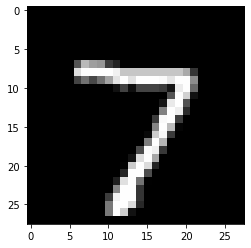

In [41]:
#Read the csv file 
Train_data = pd.read_csv("mnist_train.csv",header=0)
Test_data = pd.read_csv("mnist_test.csv",header=0)
Train_label = Train_data.iloc[:,0].values
Test_label = Test_data.iloc[:,0].values
Train_data = Train_data.iloc[:,1:].values
Test_data = Test_data.iloc[:,1:].values

print(Test_data)
#test to print a image 
img = Test_data[0].reshape(28,28)
plt.imshow(img, 'gray')
plt.show()

In [42]:
#Use the classifer
IMG_COL = 28
IMG_ROW = 28 

#Extract 2 digit from data set and lable set 
#Return numpy 2d arr for data and 1d arr for label  
def extract_two_digit(digit1,digit2,data,label):
    m_data = []
    m_label = []
    #Extrac the digit1 and digit 2 
    for i in range(0, len(label)):
        if label[i] == digit1:
            #print(Train_data[i,:])
            m_label.append(digit1)
            m_data.append(data[i])
        elif label[i]==digit2:
            m_label.append(digit2)
            m_data.append(data[i])

    return np.array(m_data), np.array(m_label)

#print the bit map (for testing)
#img: 28*28 length vector 
def printImg(img):
    img = img.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()


In [43]:
class MyClassifier:
    def __init__(self,K,M):
        self.K = K  #Number of classes
        self.M = M  #Number of features
        self.W = []
        self.w = []
        self.m_classifer_label = []
        
    def train(self, p, train_data, train_label):
        
        # THIS IS WHERE YOU SHOULD WRITE YOUR TRAINING FUNCTION
        #
        # The inputs to this function are:
        #
        # self: a reference to the classifier object.
        # train_data: a matrix of dimesions N_train x M, where N_train
        # is the number of inputs used for training. Each row is an
        # input vector.
        # trainLabel: a vector of length N_train. Each element is the
        # label for the corresponding input column vector in trainData.
        #
        # Make sure that your code sets the classifier parameters after
        # training. For example, your code should include a line that
        # looks like "self.W = a" and "self.w = b" for some variables "a"
        # and "b".
        

        #################################Start####################################
        
        #Check the train data and set the necessary parameter 
        #assert True==(train_data[0].all()!=[] and train_label!=None),"The train data or train label is None"
        self.M = len(train_data[0]) 

        #drop the data 
        self.__random_drop_data(p, train_data)
        #extract the data for each class 
        classes_data_index = [] 
        classes_label = [] 
        for i, label in enumerate(train_label):
            if(label in classes_label):
                index = classes_label.index(label)
                classes_data_index[index].append(i)
            else:
                classes_label.append(label) 
                classes_data_index.append([i])

        self.K = len(classes_label)
        
        #Train the linear classifier for every possible combination of classes 
        #Output: 
        # CxM weight matrix, M = feature count, C = combination count 
        # self.m_classifer_label: classes labels in pair corrosponding to each linear classifier. Total C pairs
        total_classifier = int(self.K*(self.K-1)/2) 
        trained_classifier = 0 
        print("Training classifier: Total "+ str(total_classifier) + " classifiers")
        for i in range(0, len(classes_label)-1): 
            label_1 = classes_label[i]
            train_data_index_1 = classes_data_index[i]
            for j in range(i+1, len(classes_label)):
                label_2 = classes_label[j]
                train_data_index_2 = classes_data_index[j]
                print("Training" + str(label_1) + " "+ str(label_2)+" classifier")
                W,w = self.__train_binary_classifier(train_data,train_data_index_1, train_data_index_2)
                #append the data 
                self.W.append(W)
                self.w.append(w)
                self.m_classifer_label.append([label_1, label_2])
                trained_classifier += 1 
                self.__print_progressbar(total_classifier, trained_classifier)
        
     


        
    def f(self,input):
        # THIS IS WHERE YOU SHOULD WRITE YOUR CLASSIFICATION FUNCTION
        #
        # The inputs of this function are:
        #
        # input: the input to the function f(*), equal to g(y) = W^T y + w
        #
        # The outputs of this function are:
        #
        # s: this should be a scalar equal to the class estimated from
        # the corresponding input data point, equal to f(W^T y + w)
        # You should also check if the classifier is trained i.e. self.W and
        # self.w are nonempty


        #################################Start####################################
        #Output: output 1 if the input is classified to be the first set in the 
        # train data set!!!!
        assert True==( self.W!=[] and self.w!=None ), "self.W or self.w equal None!!!"
        #assert True==(len(self.W) == len(input)), "The input length doest not match the classifier!!!" 
        vote_counter = {}
        for i, combo in enumerate(self.m_classifer_label):
            label_1, label_2 = combo 
            weight = self.W[i]
            bias = self.w[i]
            assert True==(len(weight) == len(input)), "The size of the weight not match the input"
            if (weight.T@input + bias >=0):
                vote_counter[label_1] = vote_counter.get(label_1,0)+1
            else:
                 vote_counter[label_2] = vote_counter.get(label_2,0)+1

        s = max(vote_counter, key= vote_counter.get)
        return s 
      
        
    def classify(self,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        # 
        # The inputs of this function are:
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line
    
    
    def TestCorrupted(self,p,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        #
        #
        # The inputs of this function are:
        #
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        # p:erasure probability
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line

    def __extract_two_digit(digit1,digit2,data,label):
        #OUTPUT:data only contan digit1, digit2, and corrosponding label 
        m_data = []
        m_label = []
        #Extrac the digit1 and digit 2 
        for i in range(0, len(label)):
            if label[i] == digit1:
                #print(Train_data[i,:])
                m_label.append(digit1)
                m_data.append(data[i])
            elif label[i]==digit2:
                m_label.append(digit2)
                m_data.append(data[i])

        return np.array(m_data), np.array(m_label)

    def __train_binary_classifier(self,train_data,train_data_1_index, train_data_2_index):
        a = cp.Variable(self.M)
        b = cp.Variable(1)
        #the size of z is the count of the set of train_data 
        #z = cp.Variable(len(train_label))
        z = cp.Variable(len(train_data_1_index) + len(train_data_2_index))
        #constrains
        constraints = [] 

        for i, index in enumerate(train_data_1_index):
            assert True == (len(train_data[index])==self.M), "The length of the train data set is not match the feature count"
            s = 1 
            constraints += [
                z[i]>=0,
                (1-s*(a.T@train_data[index]+b))<=z[i]
            ]

        for i, index in enumerate(train_data_2_index):
            assert True == (len(train_data[index])==self.M), "The length of the train data set is not match the feature count"
            s = -1 
            constraints += [
                z[i+len(train_data_1_index)]>=0,
                (1-s*(a.T@train_data[index]+b))<=z[i+len(train_data_1_index)]
            ]
        
        prob = cp.Problem(cp.Minimize(sum(z)),constraints)
        prob.solve() 
        
        return a.value, b.value
        #self.W  = a.value 
        #self.w = b.value

    def __random_drop_data(self, p, train_data):
        for i in range(len(train_data)):
            for j in range(len(train_data[0])):
                if(random.uniform(0,1)<p):
                    train_data[i][j] = 0 

    def __print_progressbar(self,total_task, cur_task):
        print(str(cur_task)+ "/"+ str(total_task))
        info = "["
        percent = cur_task/total_task 
        for i in range(0, int(60*percent)):
            info = info + "#"
        for i in range(int(60*percent), 60):
            info = info + "_"
        info = info + "]"
        print(info)


In [44]:
####################Example of Training with class 1 and 7#########################
#classifier = MyClassifier(2, 28*28)
#Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_label)
#Test_data_17,Test_label_17 = extract_two_digit(1,7,Test_data,Test_label) 
#classifier.train(0.6,Train_data_17, Train_label_17)
#classifier.train(0.6,Test_data_17, Test_label_17)


classifier = MyClassifier(2, 28*28)
#Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_label)
#Train_data_28,Train_label_28 = extract_two_digit(2,9,Train_data,Train_label)
#Test_data_17,Test_label_17 = extract_two_digit(1,7,Test_data,Test_label) 
#Test_data_28,Test_label_28 = extract_two_digit(2,8,Test_data,Test_label) 

#Test_data_4c = np.append(Test_data_17,Test_data_28,axis=0)
#Test_label_4c = np.append(Test_label_17, Test_label_28, axis= 0)

#Train_data_4c = np.append(Train_data_17,Train_data_28,axis=0)
#Train_label_4c = np.append(Train_label_17, Train_label_28, axis= 0)

#classifier.train(0.6,Train_data_17, Train_label_17)
#classifier.train(0.6,Train_data_4c, Train_label_4c)
#classifier.train(0.6,Test_data, Test_label)
Train_data_12,Train_label_12 = extract_two_digit(8,2,Train_data,Train_label)
classifier.train(0.6, Train_data, Train_label)

Training classifier: Total 45 classifiers
Training5 0 classifier
1/45
[#___________________________________________________________]
Training5 4 classifier
2/45
[##__________________________________________________________]
Training5 1 classifier
3/45
[####________________________________________________________]
Training5 9 classifier
4/45
[#####_______________________________________________________]
Training5 2 classifier
5/45
[######______________________________________________________]
Training5 3 classifier
6/45
[########____________________________________________________]
Training5 6 classifier
7/45
[#########___________________________________________________]
Training5 7 classifier
8/45
[##########__________________________________________________]
Training5 8 classifier
9/45
[############________________________________________________]
Training0 4 classifier
10/45
[#############_______________________________________________]
Training0 1 classifier
11/45
[##############___

In [45]:
#############################Test the classifer###############################
correct_count = 0
wrong_count = 0 
for i, data in enumerate(Test_data):
    predict_class = classifier.f(data)
    if(predict_class != Test_label[i]):
        wrong_count +=1
    else:
        correct_count +=1 

print("correct count: ", correct_count)
print("wrong count: " , wrong_count)
print("precision: ", round(correct_count/(correct_count+wrong_count),4)*100, "%")



correct count:  9060
wrong count:  940
precision:  90.60000000000001 %
